In [1]:
#Importing Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud 
import warnings
warnings.filterwarnings('ignore')


#Natural Language Toolkit libraries
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Happiness\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Happiness\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Happiness\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Happiness\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Happiness\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#Now carry out stemming on our example sentence

stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]

print(stemmed_text)

In [2]:
# Data Loading
# Loading the data
accommodation_reviews = pd.read_csv('tourist_accommodation_reviews.csv', encoding='cp1252')
print(f'Tourist accommodation data shape: {accommodation_reviews.shape}')
accommodation_reviews.head()

Tourist accommodation data shape: (53644, 5)


ID               Review Date Location  \
0  rn579778340      Reviewed 1 week ago     Kathu   
1  rn576350875     Reviewed 3 weeks ago     Kathu   
2  rn574921678     Reviewed 4 weeks ago     Kathu   
3  rn572905503  Reviewed April 12, 2018     Kathu   
4  rn572364712  Reviewed April 10, 2018     Kathu   

           Hotel/Restaurant name  \
0  Thong Dee The Kathu Brasserie   
1  Thong Dee The Kathu Brasserie   
2  Thong Dee The Kathu Brasserie   
3  Thong Dee The Kathu Brasserie   
4  Thong Dee The Kathu Brasserie   

                                              Review  
0  Just been for sunday roast lamb and beef truly...  
1  Quietly set off the main road, nice atmosphere...  
2  I made a reservation for a birthday two days i...  
3  We visit here regularly and never fail to be i...  
4  Visited this wonderful place on my travels and...

In [3]:
#Checking the percentage of missing data
total = accommodation_reviews.isnull().sum().sort_values(ascending = False)
percent = (accommodation_reviews.isnull().sum() / accommodation_reviews.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

Total  Percent
ID                         0      0.0
Review Date                0      0.0
Location                   0      0.0
Hotel/Restaurant name      0      0.0
Review                     0      0.0

In [4]:
#Checking and counting duplicates
accommodation_reviews.duplicated().sum()

3700

In [5]:
#Removing duplicate ID's from the dataset
accommodation_reviews.drop_duplicates(inplace=True)
print(f'Tourist accommodation data shape: {accommodation_reviews.shape}')

Tourist accommodation data shape: (49944, 5)


In [6]:
#Renaming the Hotel/Restaurant name column to Name
accommodation_reviews.rename(columns = {'Hotel/Restaurant name':'Name'}, inplace = True)
accommodation_reviews

ID               Review Date Location  \
0      rn579778340      Reviewed 1 week ago     Kathu   
1      rn576350875     Reviewed 3 weeks ago     Kathu   
2      rn574921678     Reviewed 4 weeks ago     Kathu   
3      rn572905503  Reviewed April 12, 2018     Kathu   
4      rn572364712  Reviewed April 10, 2018     Kathu   
...            ...                       ...      ...   
53639  rn162368197    Reviewed May 29, 2013    Patong   
53640  rn161843734    Reviewed May 25, 2013    Patong   
53641  rn161734077    Reviewed May 24, 2013    Patong   
53642  rn161218072    Reviewed May 19, 2013    Patong   
53643  rn161212765    Reviewed May 19, 2013    Patong   

                                Name  \
0      Thong Dee The Kathu Brasserie   
1      Thong Dee The Kathu Brasserie   
2      Thong Dee The Kathu Brasserie   
3      Thong Dee The Kathu Brasserie   
4      Thong Dee The Kathu Brasserie   
...                              ...   
53639                        Bite in   
53640                        Bite in   
53641                        Bite in   
53642                        Bite in   
53643                        Bite in   

                                                  Review  
0      Just been for sunday roast lamb and beef truly...  
1      Quietly set off the main road, nice atmosphere...  
2      I made a reservation for a birthday two days i...  
3      We visit here regularly and never fail to be i...  
4      Visited this wonderful place on my travels and...  
...                                                  ...  
53639  I love this small restaurant, for the great fo...  
53640  We stopped at this restaurant after shopping a...  
53641  Great times ,This is one of the best restauran...  
53642  Bite in, it has become my favorite restaurant ...  
53643  The restaurant put in a good location in Jungc...  

[49944 rows x 5 columns]

In [7]:
#Removing the white space from the Location and Name columns
accommodation_reviews.Location = accommodation_reviews.Location.str.strip()
accommodation_reviews.Name = accommodation_reviews.Name.str.strip()

In [8]:
#Using the info function to reveal information about the datatypes of each column
accommodation_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49944 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           49944 non-null  object
 1   Review Date  49944 non-null  object
 2   Location     49944 non-null  object
 3   Name         49944 non-null  object
 4   Review       49944 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB


In [9]:
#Reviewing the Locations in the dataset and its value count 
accommodation_reviews['Location'].value_counts()

Patong              15112
Kata Beach           5433
Karon                5296
Rawai                3471
Choeng Thale         3218
Phuket Town          3126
Kamala               2932
Mai Khao             2242
Cape Panwa           1500
Chalong              1197
Thalang District     1067
Kathu                1018
Nai Yang              986
Nai Harn              801
Bang Tao Beach        600
Wichit                375
Karon Beach           367
Talat Yai             300
Koh Kaew              293
Kata Noi Beach        200
Pa Khlok              100
Ratsada                88
Nai Thon               84
Talat Nuea             77
Sakhu                  61
Name: Location, dtype: int64

In [10]:
#Seelection of the 30 hotels for the text mining and sentiment analysis

#Creating a dataframe with the Three chosen locations in Phuket Province (Rawai, Choeng Thale and Kamala)

Rawai = accommodation_reviews[accommodation_reviews["Location"] == "Rawai"].groupby(("Name"), as_index=False).count().sort_values(by='ID', ascending=False)
ChoengThale = accommodation_reviews[accommodation_reviews["Location"] == "Choeng Thale"].groupby(("Name"), as_index=False).count().sort_values(by='ID', ascending=False)
Kamala = accommodation_reviews[accommodation_reviews["Location"] == "Kamala"].groupby(("Name"), as_index=False).count().sort_values(by='ID', ascending=False)


#Selecting the top 10 hotels in each locations
Rawai10 = Rawai.head(10)
ChoengThale10 = ChoengThale.head(10)
Kamala10 = Kamala.head(10)

#Generating 30 hotels by merging the 10 hotels from each location

Selection = Rawai10.append([ChoengThale10, Kamala10])
Selection

Name   ID  Review Date  Location  Review
0                   A Spoonful of Sugar  100          100       100     100
11                       Hooters Phuket  100          100       100     100
22             Nikitas Beach Restaurant  100          100       100     100
26               Rawai View Cafe' & Bar  100          100       100     100
1                       Atsumi Raw Cafe  100          100       100     100
31                           Rum Jungle  100          100       100     100
17                     Mamasita Mexican  100          100       100     100
16              Lucky 13 Sandwich Rawai  100          100       100     100
32                        Sala Mexicali  100          100       100     100
14                      Kook Restaurant  100          100       100     100
0                             360 ° Bar  100          100       100     100
14                                DeDos  100          100       100     100
32               The Frying Kiwi Eatery  100          100       100     100
31                The Corner Restaurant  100          100       100     100
30                    The Beach Cuisine  100          100       100     100
29                Tawai Thai Restaurant  100          100       100     100
28                    Taste Bar & Grill  100          100       100     100
27                    Sunset Restaurant  100          100       100     100
25                     Siam Supper Club  100          100       100     100
23              Nok and Jo's Restaurant  100          100       100     100
0                              Baan Mai  100          100       100     100
14                        Karon Seafood  100          100       100     100
30                         White Orchid  100          100       100     100
28  Top Of The Reef at Cape Panwa Hotel  100          100       100     100
27                            The Place  100          100       100     100
26                     The Greek Tavern  100          100       100     100
25                               Tantra  100          100       100     100
24                             THE DECK  100          100       100     100
23               Sweet Dream Restaurant  100          100       100     100
22                            Smile Bar  100          100       100     100

In [11]:
#Filter to select the chosen 30 hotels from the main dataframe
Phuket_Reviews = accommodation_reviews[accommodation_reviews["Name"].isin(Selection["Name"])]
Phuket_Reviews

ID                  Review Date      Location  \
693    rn579764759         Reviewed 1 week ago   Choeng Thale   
694    rn578974368         Reviewed 1 week ago   Choeng Thale   
695    rn578354847        Reviewed 2 weeks ago   Choeng Thale   
696    rn578351412        Reviewed 2 weeks ago   Choeng Thale   
697    rn578257530        Reviewed 2 weeks ago   Choeng Thale   
...            ...                          ...           ...   
52475  rn337159219    Reviewed January 4, 2016         Kamala   
52476  rn335662582  Reviewed December 29, 2015         Kamala   
52477  rn334004242  Reviewed December 20, 2015         Kamala   
52478  rn329307909  Reviewed November 26, 2015         Kamala   
52479  rn327353302  Reviewed November 17, 2015         Kamala   

                   Name                                             Review  
693    Siam Supper Club  I keep going to Supper Club like it is my seco...  
694    Siam Supper Club  Delicious! The food was great and the service ...  
695    Siam Supper Club  A special location with a fantastictic good at...  
696    Siam Supper Club  Went on a Monday and there was live jazz which...  
697    Siam Supper Club  Can always judge a restaurant when you arrive ...  
...                 ...                                                ...  
52475     Karon Seafood  This is a busy restaurant but the service is v...  
52476     Karon Seafood  It was our first night in Karon and we didn't ...  
52477     Karon Seafood  We unfortunately didn't read trip-advisor befo...  
52478     Karon Seafood  Ordered springrolls, phad tai and red curry.\r...  
52479     Karon Seafood  Just that simply adequate. Caters for all sort...  

[3000 rows x 5 columns]

In [12]:
#Counting the values of the dataframe
Phuket_Reviews['Name'].value_counts()

Siam Supper Club                       100
The Corner Restaurant                  100
Top Of The Reef at Cape Panwa Hotel    100
Lucky 13 Sandwich Rawai                100
Hooters Phuket                         100
Nikitas Beach Restaurant               100
Mamasita Mexican                       100
Atsumi Raw Cafe                        100
The Frying Kiwi Eatery                 100
Rum Jungle                             100
Sweet Dream Restaurant                 100
Tawai Thai Restaurant                  100
THE DECK                               100
Smile Bar                              100
White Orchid                           100
Sunset Restaurant                      100
Sala Mexicali                          100
Rawai View Cafe' & Bar                 100
Nok and Jo's Restaurant                100
Baan Mai                               100
360 ° Bar                              100
The Place                              100
Tantra                                 100
DeDos      

In [13]:
##Droping the columns that are not needed for the analysis

Phuket_Reviews.drop(columns=['ID','Review Date'], inplace=True)

In [14]:
##Droping the dataframe index

Phuket_Reviews = Phuket_Reviews.reset_index(drop=True)
Phuket_Reviews

Location              Name  \
0     Choeng Thale  Siam Supper Club   
1     Choeng Thale  Siam Supper Club   
2     Choeng Thale  Siam Supper Club   
3     Choeng Thale  Siam Supper Club   
4     Choeng Thale  Siam Supper Club   
...            ...               ...   
2995        Kamala     Karon Seafood   
2996        Kamala     Karon Seafood   
2997        Kamala     Karon Seafood   
2998        Kamala     Karon Seafood   
2999        Kamala     Karon Seafood   

                                                 Review  
0     I keep going to Supper Club like it is my seco...  
1     Delicious! The food was great and the service ...  
2     A special location with a fantastictic good at...  
3     Went on a Monday and there was live jazz which...  
4     Can always judge a restaurant when you arrive ...  
...                                                 ...  
2995  This is a busy restaurant but the service is v...  
2996  It was our first night in Karon and we didn't ...  
2997  We unfortunately didn't read trip-advisor befo...  
2998  Ordered springrolls, phad tai and red curry.\r...  
2999  Just that simply adequate. Caters for all sort...  

[3000 rows x 3 columns]

In [15]:
#Generate the summary of the dataset using describe
Phuket_Reviews.describe()

Location              Name  \
count           3000              3000   
unique             3                30   
top     Choeng Thale  Siam Supper Club   
freq            1000               100   

                                                   Review  
count                                                3000  
unique                                               3000  
top     I keep going to Supper Club like it is my seco...  
freq                                                    1

In [16]:
#Defining stop words

stop_words = nltk.corpus.stopwords.words('english')

In [17]:
#Creating a function to apply all of our data preprocessing steps which we can then use on a corpus

def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenize
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming
    return stemmed_text

In [18]:
# Using the function earlier defined to carry out the pre-processing of text data steps for a Bag-of-Words model
#and wordcloud visualization

Phuket_Reviews['processed_review'] = Phuket_Reviews['Review'].apply(preprocess_text)

Phuket_Reviews.head(10)

Location              Name  \
0  Choeng Thale  Siam Supper Club   
1  Choeng Thale  Siam Supper Club   
2  Choeng Thale  Siam Supper Club   
3  Choeng Thale  Siam Supper Club   
4  Choeng Thale  Siam Supper Club   
5  Choeng Thale  Siam Supper Club   
6  Choeng Thale  Siam Supper Club   
7  Choeng Thale  Siam Supper Club   
8  Choeng Thale  Siam Supper Club   
9  Choeng Thale  Siam Supper Club   

                                              Review  \
0  I keep going to Supper Club like it is my seco...   
1  Delicious! The food was great and the service ...   
2  A special location with a fantastictic good at...   
3  Went on a Monday and there was live jazz which...   
4  Can always judge a restaurant when you arrive ...   
5  This is the best restaurant I have ever had. I...   
6  Visited this place because of the reviews on T...   
7  This place was not really for us.\r\nIt's a da...   
8  This was a gem of a find and we had a very goo...   
9  We were staying nearby at the Laguna resort bu...   

                                    processed_review  
0  [keep, go, supper, club, like, second, home, b...  
1  [delici, food, great, servic, fab, wine, list,...  
2  [special, locat, fantastict, good, atmospher, ...  
3  [went, monday, live, jazz, realli, good, food,...  
4  [alway, judg, restaur, arriv, book, promptli, ...  
5  [best, restaur, ever, 6, star, rate, amaz, foo...  
6  [visit, place, review, ta, disappoint, siam, s...  
7  [place, realli, us, dark, place, tri, throwbac...  
8  [gem, find, good, meal, excel, qualiti, 5, us,...  
9  [stay, nearbi, laguna, resort, manag, get, cab...

In [19]:
# Using CountVectorizer function to extract unigrams from the reviews before removing stop words

text = Phuket_Reviews['Review']


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(text, 20)
for word, freq in common_words:
    print(word, freq)
OldTop20 = pd.DataFrame(common_words, columns = ['Review' , 'count'])


the 6311
and 5038
we 2292
to 2153
was 2088
food 2059
more 1861
is 1848
of 1572
in 1461
for 1404
it 1226
good 1176
very 1123
this 1079
with 1059
great 1011
had 909
were 865
restaurant 856


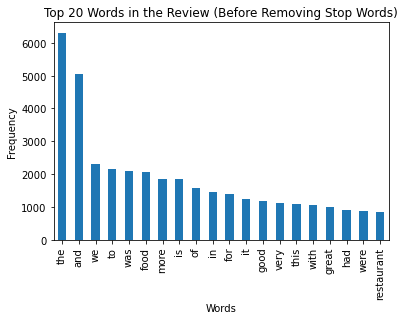

In [20]:
#Visualizing the top 20 most frequent words (unigrams) in the review before removing stop words

OldTop20.plot(x='Review', y='count', kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in the Review (Before Removing Stop Words)')
plt.legend('', frameon=False)
plt.show()

In [21]:
# Using CountVectorizer function to extract unigrams from the mined reviews (after removing stop words)

text = Phuket_Reviews['processed_review']

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words((text.map(' '.join)), 20)
for word, freq in common_words:
    print(word, freq)
Top_20_Words = pd.DataFrame(common_words, columns = ['processed_review' , 'count'])

food 2080
good 1178
great 1013
restaur 970
place 832
servic 766
staff 636
thai 536
nice 526
friendli 473
time 460
love 452
visit 401
price 397
recommend 364
best 343
delici 341
order 338
realli 333
excel 318


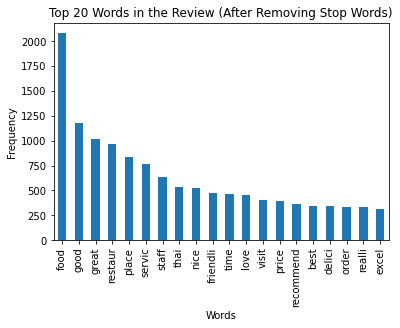

In [22]:
#Visualizing the top 20 most frequent words in the review (after removing stop words)

Top_20_Words.plot(x='processed_review', y='count', kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in the Review (After Removing Stop Words)')
plt.legend('', frameon=False)
plt.show()

SENTIMENT ANALYSIS

In [23]:
#Using SentimentIntensityAnalyzer within NLTK outputs a dictionary with a negative score, a neutral score and a positive score. These sum to 1

sentiment = SentimentIntensityAnalyzer()

#Extracting the sentiment polarity score values from the dictionary and creating new columns within our dataframe

Phuket_Reviews['Compound'] = [sentiment.polarity_scores(Review)['compound'] for Review in (Phuket_Reviews['Review'].astype(str))]
Phuket_Reviews['Neg'] = [sentiment.polarity_scores(Review)['neg'] for Review in (Phuket_Reviews['Review'].astype(str))]
Phuket_Reviews['Neu'] = [sentiment.polarity_scores(Review)['neu'] for Review in (Phuket_Reviews['Review'].astype(str))]
Phuket_Reviews['Pos'] = [sentiment.polarity_scores(Review)['pos'] for Review in (Phuket_Reviews['Review'].astype(str))]

In [24]:
#viewing the dataframe to confirm the newly created columns
Phuket_Reviews.head()

Location              Name  \
0  Choeng Thale  Siam Supper Club   
1  Choeng Thale  Siam Supper Club   
2  Choeng Thale  Siam Supper Club   
3  Choeng Thale  Siam Supper Club   
4  Choeng Thale  Siam Supper Club   

                                              Review  \
0  I keep going to Supper Club like it is my seco...   
1  Delicious! The food was great and the service ...   
2  A special location with a fantastictic good at...   
3  Went on a Monday and there was live jazz which...   
4  Can always judge a restaurant when you arrive ...   

                                    processed_review  Compound    Neg    Neu  \
0  [keep, go, supper, club, like, second, home, b...    0.9078  0.000  0.764   
1  [delici, food, great, servic, fab, wine, list,...    0.9020  0.000  0.575   
2  [special, locat, fantastict, good, atmospher, ...    0.9217  0.000  0.693   
3  [went, monday, live, jazz, realli, good, food,...    0.8660  0.059  0.694   
4  [alway, judg, restaur, arriv, book, promptli, ...    0.6705  0.045  0.798   

     Pos  
0  0.236  
1  0.425  
2  0.307  
3  0.246  
4  0.157

In [25]:
#Checkinhg the statistical analysis
Phuket_Reviews[['Compound', 'Neg', 'Neu', 'Pos']].describe()

Compound          Neg          Neu          Pos
count  3000.000000  3000.000000  3000.000000  3000.000000
mean      0.704101     0.023531     0.728960     0.247506
std       0.379966     0.047091     0.125777     0.133119
min      -0.965400     0.000000     0.297000     0.000000
25%       0.658800     0.000000     0.644000     0.150000
50%       0.862500     0.000000     0.737000     0.240000
75%       0.931125     0.037000     0.816000     0.337000
max       0.990700     0.423000     1.000000     0.703000

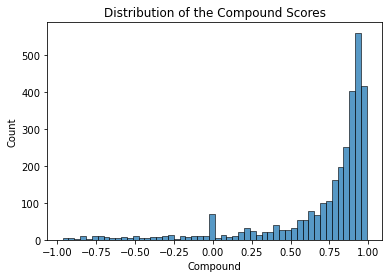

In [26]:
#Visualizing the distribution of compound

sns.histplot(Phuket_Reviews['Compound'])
plt.title('Distribution of the Compound Scores')
plt.show()

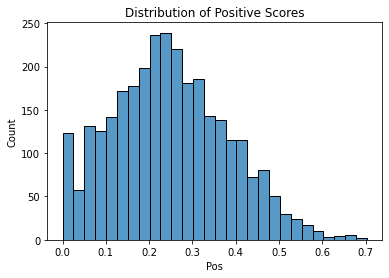

In [27]:
#Visualizing the distribution of pos

sns.histplot(Phuket_Reviews['Pos'])
plt.title('Distribution of Positive Scores')
plt.show()

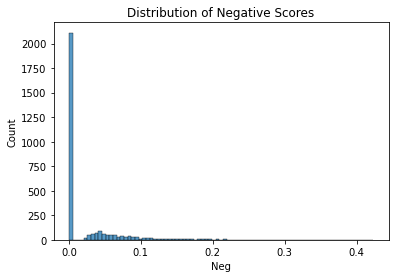

In [28]:
#Visualizing the distribution of neg

sns.histplot(Phuket_Reviews['Neg'])
plt.title('Distribution of Negative Scores')
plt.show()

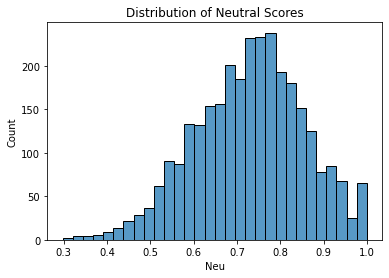

In [29]:
#Visualizing the distribution of neu

sns.histplot(Phuket_Reviews['Neu'])
plt.title('Distribution of Neutral Scores')
plt.show()

In [30]:
# Checking Positive reviews per hotel/Restaurant

(Phuket_Reviews['Compound']>0).groupby(Phuket_Reviews['Name']).sum().sort_values(ascending=False)

Name
Sweet Dream Restaurant                 98
Siam Supper Club                       96
The Beach Cuisine                      96
DeDos                                  96
A Spoonful of Sugar                    96
Nikitas Beach Restaurant               95
The Corner Restaurant                  95
Rawai View Cafe' & Bar                 95
360 ° Bar                              95
Kook Restaurant                        95
Atsumi Raw Cafe                        94
Taste Bar & Grill                      93
Baan Mai                               93
Nok and Jo's Restaurant                92
Rum Jungle                             92
Top Of The Reef at Cape Panwa Hotel    92
Smile Bar                              92
The Frying Kiwi Eatery                 92
Mamasita Mexican                       91
The Greek Tavern                       91
THE DECK                               90
Tantra                                 90
Sunset Restaurant                      90
Hooters Phuket               

In [31]:
#Calculating the percentage of the total positive reviews

percent_positive = pd.DataFrame((Phuket_Reviews['Compound']>0).groupby(Phuket_Reviews['Name']).sum()
                                /Phuket_Reviews['Name'].groupby(Phuket_Reviews['Name']).count()*100,
                                columns=['% Positive reviews']).sort_values(by='% Positive reviews', ascending=False)

percent_positive

% Positive reviews
Name                                                   
Sweet Dream Restaurant                             98.0
Siam Supper Club                                   96.0
The Beach Cuisine                                  96.0
DeDos                                              96.0
A Spoonful of Sugar                                96.0
Nikitas Beach Restaurant                           95.0
The Corner Restaurant                              95.0
Rawai View Cafe' & Bar                             95.0
360 ° Bar                                          95.0
Kook Restaurant                                    95.0
Atsumi Raw Cafe                                    94.0
Taste Bar & Grill                                  93.0
Baan Mai                                           93.0
Nok and Jo's Restaurant                            92.0
Rum Jungle                                         92.0
Top Of The Reef at Cape Panwa Hotel                92.0
Smile Bar                                          92.0
The Frying Kiwi Eatery                             92.0
Mamasita Mexican                                   91.0
The Greek Tavern                                   91.0
THE DECK                                           90.0
Tantra                                             90.0
Sunset Restaurant                                  90.0
Hooters Phuket                                     89.0
The Place                                          89.0
White Orchid                                       87.0
Tawai Thai Restaurant                              86.0
Sala Mexicali                                      86.0
Lucky 13 Sandwich Rawai                            84.0
Karon Seafood                                      73.0

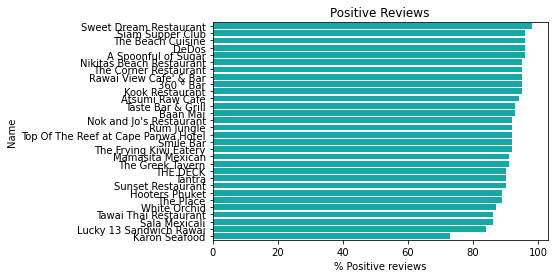

In [32]:
#Visualizing the positive reviews using seaborn

sns.barplot(data=percent_positive, x = '% Positive reviews', y=percent_positive.index, color='c')
plt.title('Positive Reviews')
plt.show()

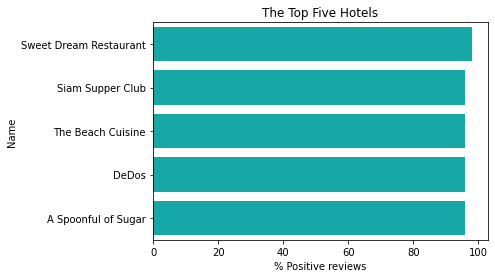

In [33]:
#Visualizing the best five hotels using seaborn
top_five = percent_positive.head(5)
sns.barplot(data=top_five, x = '% Positive reviews', y=top_five.index, color='c')
plt.title('The Top Five Hotels')
plt.show()

In [34]:
#Checking negative reviews per hotel/Restaurant

(Phuket_Reviews['Compound']<=0).groupby(Phuket_Reviews['Name']).sum().sort_values(ascending=False)

Name
Karon Seafood                          27
Lucky 13 Sandwich Rawai                16
Sala Mexicali                          14
Tawai Thai Restaurant                  14
White Orchid                           13
Hooters Phuket                         11
The Place                              11
THE DECK                               10
Sunset Restaurant                      10
Tantra                                 10
Mamasita Mexican                        9
The Greek Tavern                        9
Nok and Jo's Restaurant                 8
The Frying Kiwi Eatery                  8
Rum Jungle                              8
Smile Bar                               8
Top Of The Reef at Cape Panwa Hotel     8
Taste Bar & Grill                       7
Baan Mai                                7
Atsumi Raw Cafe                         6
The Corner Restaurant                   5
360 ° Bar                               5
Rawai View Cafe' & Bar                  5
Nikitas Beach Restaurant     

In [35]:
#Calculating the percentage of the total negative reviews

percent_negative = pd.DataFrame((Phuket_Reviews['Compound']<=0).groupby(Phuket_Reviews['Name']).sum()
                                /Phuket_Reviews['Name'].groupby(Phuket_Reviews['Name']).count()*100,
                                columns=['% Negative reviews']).sort_values(by='% Negative reviews', ascending=False)

percent_negative


% Negative reviews
Name                                                   
Karon Seafood                                      27.0
Lucky 13 Sandwich Rawai                            16.0
Sala Mexicali                                      14.0
Tawai Thai Restaurant                              14.0
White Orchid                                       13.0
Hooters Phuket                                     11.0
The Place                                          11.0
THE DECK                                           10.0
Sunset Restaurant                                  10.0
Tantra                                             10.0
Mamasita Mexican                                    9.0
The Greek Tavern                                    9.0
Nok and Jo's Restaurant                             8.0
The Frying Kiwi Eatery                              8.0
Rum Jungle                                          8.0
Smile Bar                                           8.0
Top Of The Reef at Cape Panwa Hotel                 8.0
Taste Bar & Grill                                   7.0
Baan Mai                                            7.0
Atsumi Raw Cafe                                     6.0
The Corner Restaurant                               5.0
360 ° Bar                                           5.0
Rawai View Cafe' & Bar                              5.0
Nikitas Beach Restaurant                            5.0
Kook Restaurant                                     5.0
The Beach Cuisine                                   4.0
A Spoonful of Sugar                                 4.0
DeDos                                               4.0
Siam Supper Club                                    4.0
Sweet Dream Restaurant                              2.0

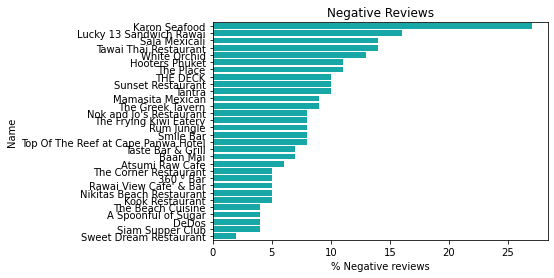

In [36]:
#Visualizing the negative reviews using seaborn

sns.barplot(data=percent_negative, x = '% Negative reviews', y=percent_negative.index, color='c')
plt.title('Negative Reviews')
plt.show()

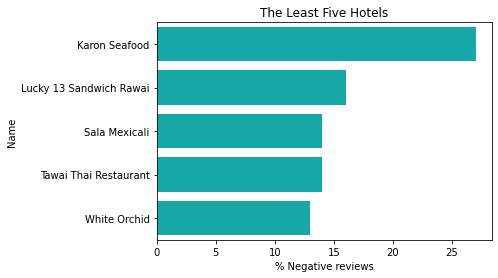

In [37]:
#Visualizing the least five hotels using seaborn

least_five = percent_negative.head(5)
sns.barplot(data=least_five, x = '% Negative reviews', y=least_five.index, color='c')
plt.title('The Least Five Hotels')
plt.show()

REVIEW FOR RAWAI HOTELS/RESTAURANTS (MUEANG PHUKET DISTRICT)

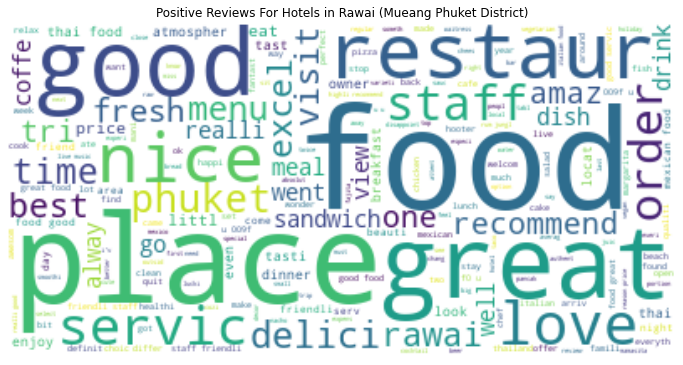

In [38]:
#Review for hotels in Rawai

Rawai_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Location']=='Rawai')&(Phuket_Reviews['Compound']>0),:]

Rawai_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Location']=='Rawai')&(Phuket_Reviews['Compound']<=0),:]
              
#Wordcloud of words from positive reviews for hotels in Rawai

Rawai_pos_tokens = [word for review in Rawai_positive_subset['processed_review'] for word in review]

Rawai_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(Rawai_pos_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(Rawai_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews For Hotels in Rawai (Mueang Phuket District)')
plt.axis('off')
plt.show()

    food     good    great    place  restaur        u   servic    staff     nice friendli 
     654      412      371      296      233      224      220      213      190      169 


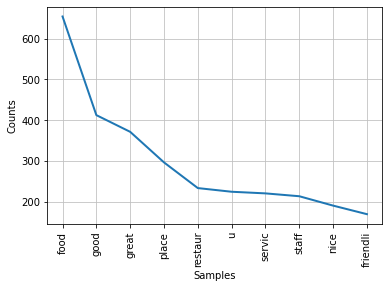

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
#use the nltk FreqDist and then tabulate the positive reviews

Rawai_pos_freqdist = FreqDist(Rawai_pos_tokens)

Rawai_pos_freqdist.tabulate(10)

#Visualizing the frequency distribution of the top ten positive reviews

Rawai_pos_freqdist.plot(10)

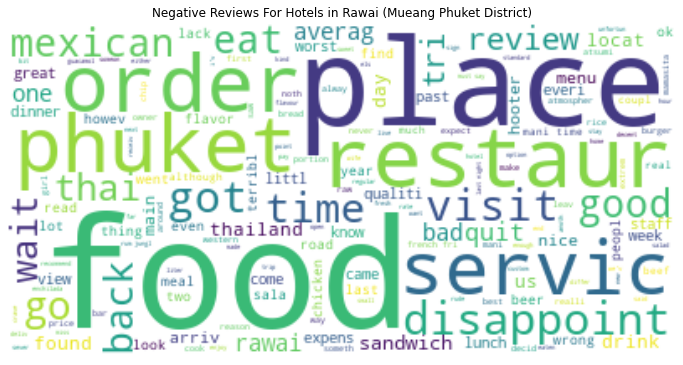

In [40]:
#Wordcloud of words from negative reviews for hotels in Choeng Thale

Rawai_neg_tokens = [word for review in Rawai_negative_subset['processed_review'] for word in review]

Rawai_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(Rawai_neg_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(Rawai_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews For Hotels in Rawai (Mueang Phuket District)')
plt.axis('off')
plt.show()

      food      place    restaur       time      order     phuket     servic disappoint        got      visit 
        46         28         20         18         18         17         17         15         14         14 


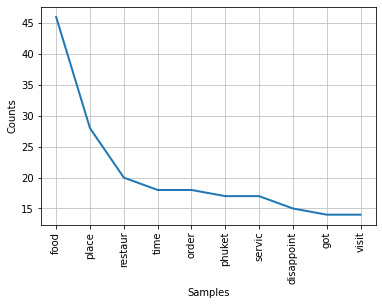

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [41]:
#use the nltk FreqDist and then tabulate the negative reviews


Rawai_neg_freqdist = FreqDist(Rawai_neg_tokens)

Rawai_neg_freqdist.tabulate(10)

#Visualizing the frequency distribution of top ten negative reviews

Rawai_neg_freqdist.plot(10)

REVIEW FOR CHOENG THALE HOTELS/RESTAURANTS (THALANG DISTRICT)

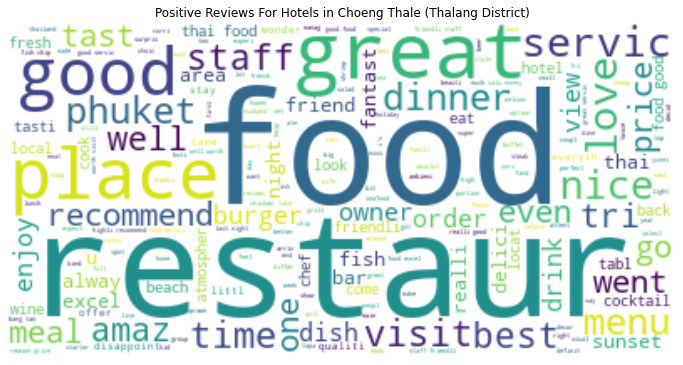

In [42]:
#Review for hotels in Choeng Thale 

ChoengThale_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Location']=='Choeng Thale')&(Phuket_Reviews['Compound']>0),:]

ChoengThale_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Location']=='Choeng Thale')&(Phuket_Reviews['Compound']<=0),:]
              
#Wordcloud of words from positive reviews for hotels in Choeng Thale

ChoengThale_pos_tokens = [word for review in ChoengThale_positive_subset['processed_review'] for word in review]

ChoengThale_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(ChoengThale_pos_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(ChoengThale_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews For Hotels in Choeng Thale (Thalang District)')
plt.axis('off')
plt.show()

   food    good   great restaur  servic   place   staff    thai    love    nice 
    589     356     331     299     260     232     163     161     151     144 


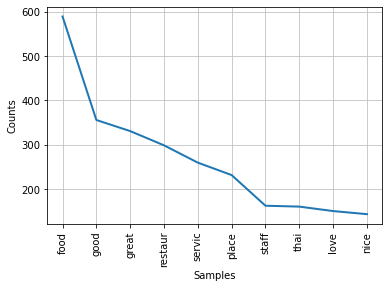

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [43]:
#use the nltk FreqDist and then tabulate the positive reviews

ChoengThale_pos_freqdist = FreqDist(ChoengThale_pos_tokens)

ChoengThale_pos_freqdist.tabulate(10)

#Visualizing the frequency distribution of the top ten positive reviews

ChoengThale_pos_freqdist.plot(10)

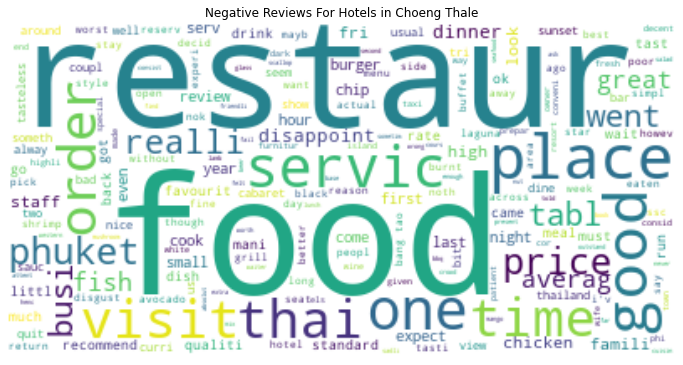

In [44]:
#Wordcloud of words from negative reviews for hotels in Choeng Thale

ChoengThale_neg_tokens = [word for review in ChoengThale_negative_subset['processed_review'] for word in review]

ChoengThale_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(ChoengThale_neg_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(ChoengThale_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews For Hotels in Choeng Thale')
plt.axis('off')
plt.show()

   food restaur   place    good  servic     one   visit   order    time    thai 
     36      33      17      16      14      14      12      12      11      11 


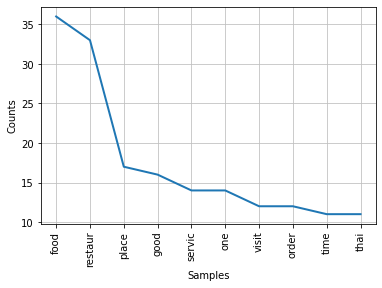

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [45]:
#use the nltk FreqDist and then tabulate the negative reviews


ChoengThale_neg_freqdist = FreqDist(ChoengThale_neg_tokens)

ChoengThale_neg_freqdist.tabulate(10)

#Visualizing the frequency distribution of top ten negative reviews

ChoengThale_neg_freqdist.plot(10)

REVIEW FOR KAMALA HOTELS/RESTAURANTS (KATHU DISTRICT)

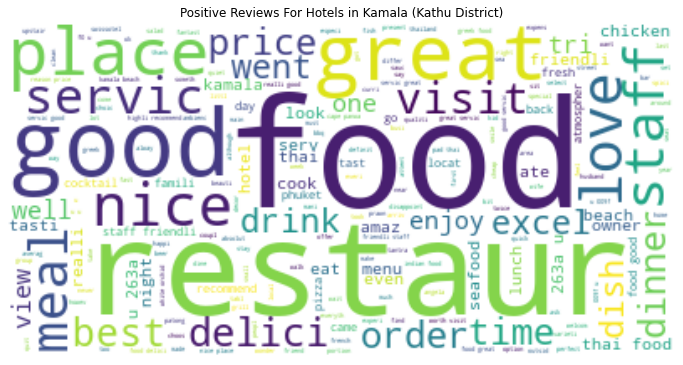

In [46]:
#Review for hotels in Kamala

Kamala_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Location']=='Kamala')&(Phuket_Reviews['Compound']>0),:]

Kamala_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Location']=='Kamala')&(Phuket_Reviews['Compound']<=0),:]
                                

#Wordcloud of words from positive reviews for hotels in Kamala

Kamala_pos_tokens = [word for review in Kamala_positive_subset['processed_review'] for word in review]

Kamala_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(Kamala_pos_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(Kamala_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews For Hotels in Kamala (Kathu District)')
plt.axis('off')
plt.show()

    food     good  restaur    great        u   servic    staff    place     thai friendli 
     681      365      334      293      255      233      227      226      207      177 


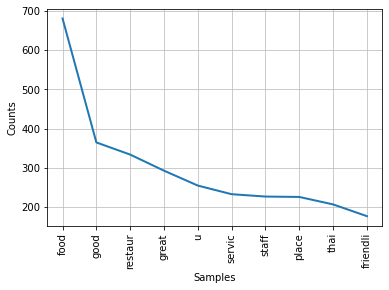

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [47]:
#use the nltk FreqDist and then tabulate the positive reviews

Kamala_pos_freqdist = FreqDist(Kamala_pos_tokens)

Kamala_pos_freqdist.tabulate(10)

##Visualize the frequency of top ten positive reviews

Kamala_pos_freqdist.plot(10)

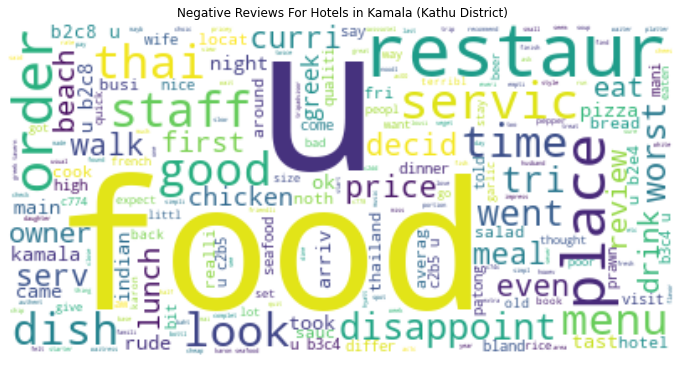

In [48]:
#Wordcloud of words from negative reviews for Kamala

Kamala_neg_tokens = [word for review in Kamala_negative_subset['processed_review'] for word in review]

Kamala_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(Kamala_neg_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(Kamala_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews For Hotels in Kamala (Kathu District)')
plt.axis('off')
plt.show()

      u    food restaur   place   order  servic   staff    thai    good    look 
    137      74      51      30      26      22      20      18      18      17 


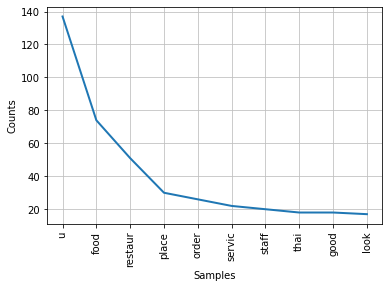

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [49]:
#use the nltk FreqDist and then tabulate the negative reviews


Kamala_neg_freqdist = FreqDist(Kamala_neg_tokens)

Kamala_neg_freqdist.tabulate(10)

##Visualize the frequency of top ten negative reviews

Kamala_neg_freqdist.plot(10)

POSITIVE REVIEWS FOR THE TOP FIVE HOTELS/RESTAURANTS IN PHUKET PROVINCE

SWEET DREAM RESTAURANT (KAMALA - KATHU DISTRICT)

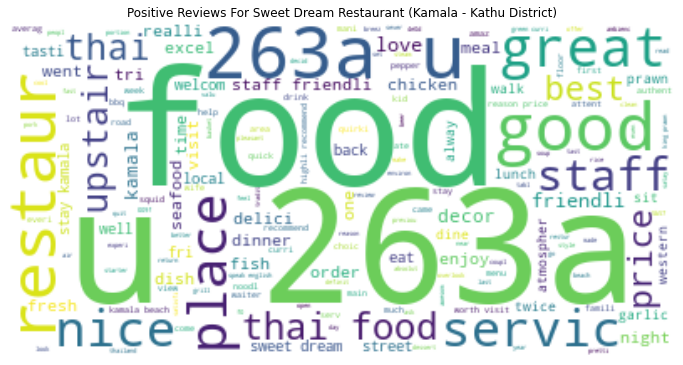

In [50]:
#Review for The Sweet Dream Restaurant

SweetDreamRestaurant_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='Sweet Dream Restaurant')&(Phuket_Reviews['Compound']>0),:]

SweetDreamRestaurant_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='Sweet Dream Restaurant')&(Phuket_Reviews['Compound']<=0),:]


#Wordcloud of words from positive reviews

SweetDreamRestaurant_pos_tokens = [word for review in SweetDreamRestaurant_positive_subset['processed_review'] for word in review]

SweetDreamRestaurant_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(SweetDreamRestaurant_pos_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(SweetDreamRestaurant_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews For Sweet Dream Restaurant (Kamala - Kathu District)')
plt.axis('off')
plt.show()

      u    food    263a    good restaur 
    103      85      64      51      48 


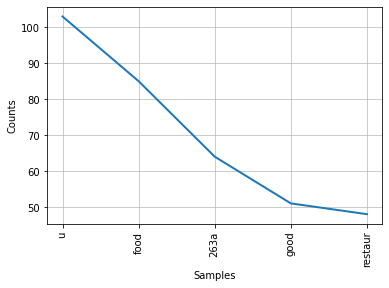

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [51]:
#use the nltk FreqDist and then tabulate the positive reviews

SweetDreamRestaurant_pos_freqdist = FreqDist(SweetDreamRestaurant_pos_tokens)

SweetDreamRestaurant_pos_freqdist.tabulate(5)

##Visualize the frequency of the top five positive reviews

SweetDreamRestaurant_pos_freqdist.plot(5)

THE BEACH CUISINE (CHOENG THALE - THALANG DISTRICT)

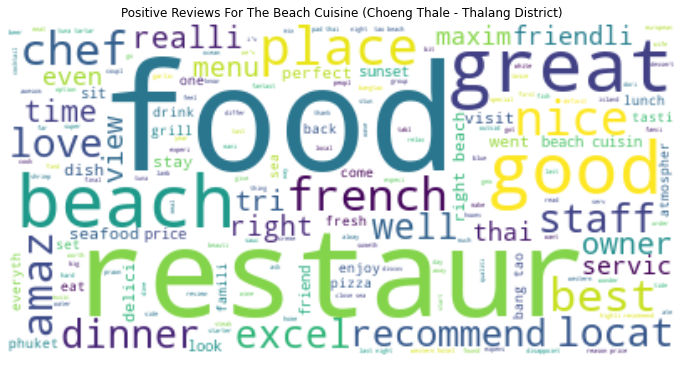

In [52]:
#Review for The The Beach Cuisine

TheBeachCuisine_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='The Beach Cuisine')&(Phuket_Reviews['Compound']>0),:]

TheBeachCuisine_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='The Beach Cuisine')&(Phuket_Reviews['Compound']<=0),:]


#Wordcloud of words from positive reviews

TheBeachCuisine_pos_tokens = [word for review in TheBeachCuisine_positive_subset['processed_review'] for word in review]

TheBeachCuisine_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(TheBeachCuisine_pos_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(TheBeachCuisine_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews For The Beach Cuisine (Choeng Thale - Thalang District)')
plt.axis('off')
plt.show()

  beach    food restaur   great    good 
     62      57      38      37      33 


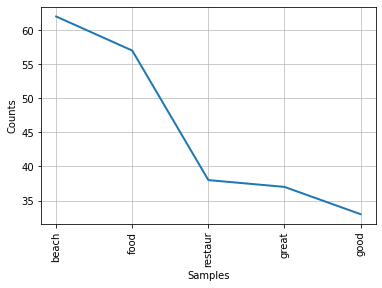

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
#use the nltk FreqDist and then tabulate the positive reviews

TheBeachCuisine_pos_freqdist = FreqDist(TheBeachCuisine_pos_tokens)

TheBeachCuisine_pos_freqdist.tabulate(5)

##Visualize the frequency of the top five positive reviews

TheBeachCuisine_pos_freqdist.plot(5)

SIAM SUPPER CLUB (CHOENG THALE - THALANG DISTRICT)

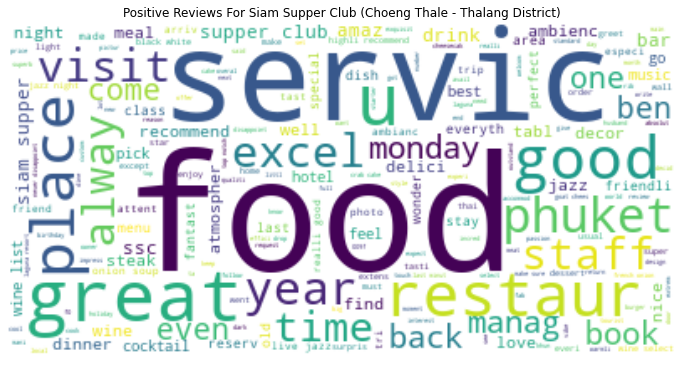

In [54]:
#Review for The Siam Supper Club

SiamSupperClub_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='Siam Supper Club')&(Phuket_Reviews['Compound']>0),:]

SiamSupperClub_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='Siam Supper Club')&(Phuket_Reviews['Compound']<=0),:]


#Wordcloud of words from positive reviews

SiamSupperClub_pos_tokens = [word for review in SiamSupperClub_positive_subset['processed_review'] for word in review]

SiamSupperClub_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(SiamSupperClub_pos_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(SiamSupperClub_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews For Siam Supper Club (Choeng Thale - Thalang District)')
plt.axis('off')
plt.show()

   food  servic   great    good restaur 
     60      39      37      32      28 


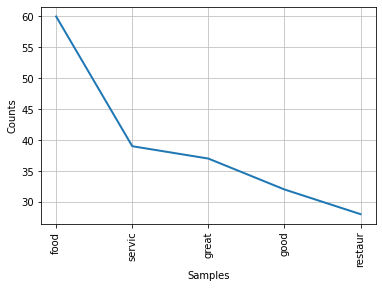

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [55]:
#use the nltk FreqDist and then tabulate the positive reviews

SiamSupperClub_pos_freqdist = FreqDist(SiamSupperClub_pos_tokens)

SiamSupperClub_pos_freqdist.tabulate(5)

##Visualize the frequency of the top five positive reviews

SiamSupperClub_pos_freqdist.plot(5)

DEDOS (CHOENG THALE - THALANG DISTRICT)

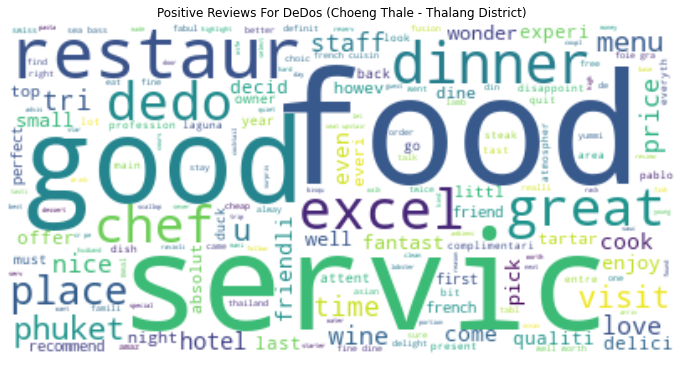

In [56]:
#Review for The DeDos

DeDos_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='DeDos')&(Phuket_Reviews['Compound']>0),:]

DeDos_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='DeDos')&(Phuket_Reviews['Compound']<=0),:]


#Wordcloud of words from positive reviews

DeDos_pos_tokens = [word for review in DeDos_positive_subset['processed_review'] for word in review]

DeDos_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(DeDos_pos_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(DeDos_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews For DeDos (Choeng Thale - Thalang District)')
plt.axis('off')
plt.show()

   food  servic    good restaur  dinner 
     60      46      44      41      26 


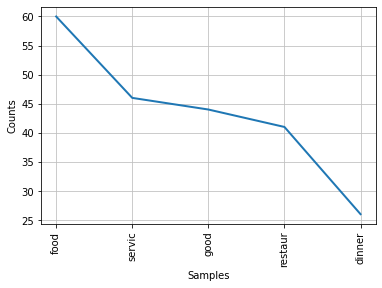

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [57]:
#use the nltk FreqDist and then tabulate the positive reviews

DeDos_pos_freqdist = FreqDist(DeDos_pos_tokens)

DeDos_pos_freqdist.tabulate(5)

##Visualize the frequency of the top five positive reviews

DeDos_pos_freqdist.plot(5)

A SPOONFUL OF SUGAR (RAWAI - MUEANG PHUKET DISTRICT)

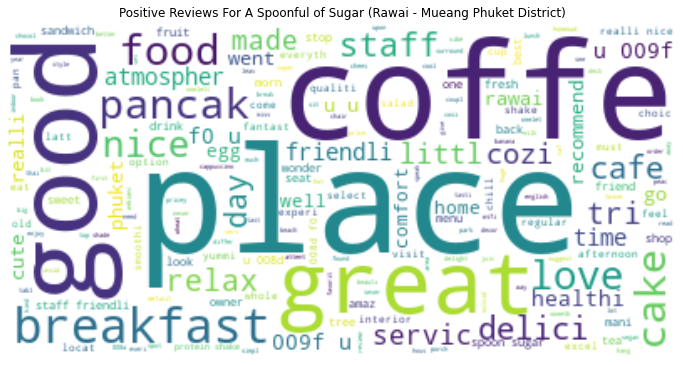

In [58]:
#Review for A Spoonful of Sugar

ASpoonfulofSugar_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='A Spoonful of Sugar')&(Phuket_Reviews['Compound']>0),:]

ASpoonfulofSugar_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='A Spoonful of Sugar')&(Phuket_Reviews['Compound']<=0),:]


#Wordcloud of words from positive reviews

ASpoonfulofSugar_pos_tokens = [word for review in ASpoonfulofSugar_positive_subset['processed_review'] for word in review]

ASpoonfulofSugar_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(ASpoonfulofSugar_pos_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(ASpoonfulofSugar_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews For A Spoonful of Sugar (Rawai - Mueang Phuket District)')
plt.axis('off')
plt.show()

    place     coffe      good     great breakfast 
       58        56        39        37        37 


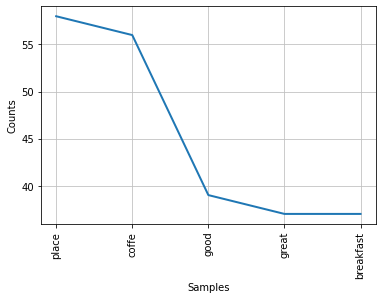

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [59]:
#use the nltk FreqDist and then tabulate the positive reviews

ASpoonfulofSugar_pos_freqdist = FreqDist(ASpoonfulofSugar_pos_tokens)

ASpoonfulofSugar_pos_freqdist.tabulate(5)

##Visualize the frequency of the top five positive reviews

ASpoonfulofSugar_pos_freqdist.plot(5)

NEGATIVE REVIEWS FOR THE FIVE LEAST HOTELS/RESTAURANTS IN PHUKET PROVINCE

KARON SEAFOOD (KAMALA - KATHU DISTRICT)

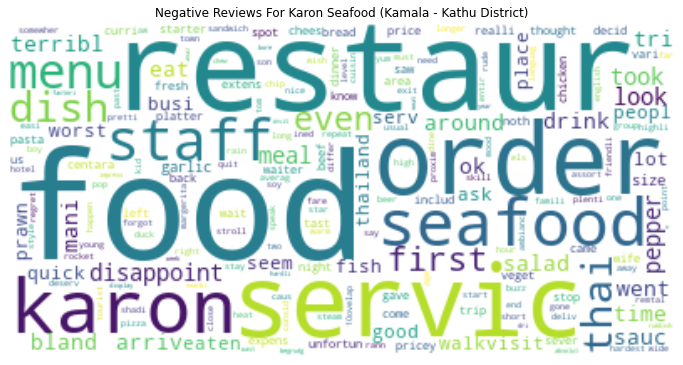

In [60]:
#Review for Karon Seafood

KaronSeafood_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='Karon Seafood')&(Phuket_Reviews['Compound']>0),:]

KaronSeafood_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='Karon Seafood')&(Phuket_Reviews['Compound']<=0),:]
                                

#Wordcloud of words from negative reviews

KaronSeafood_neg_tokens = [word for review in KaronSeafood_negative_subset['processed_review'] for word in review]

KaronSeafood_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(KaronSeafood_neg_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(KaronSeafood_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews For Karon Seafood (Kamala - Kathu District)')
plt.axis('off')
plt.show()

   food restaur  servic   order   karon 
     17      15      11      11       9 


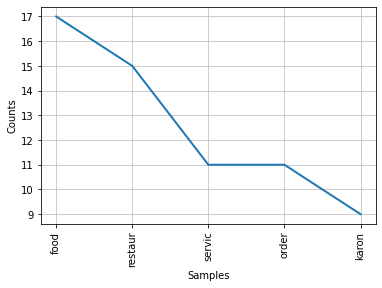

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [61]:
#use the nltk FreqDist and then tabulate the negative reviews


KaronSeafood_neg_freqdist = FreqDist(KaronSeafood_neg_tokens)

KaronSeafood_neg_freqdist.tabulate(5)

##Visualize the frequency of top five negative reviews

KaronSeafood_neg_freqdist.plot(5)

LUCKY 13 SANDWICH RAWAI (RAWAI - MUEANG PHUKET DISTRICT)

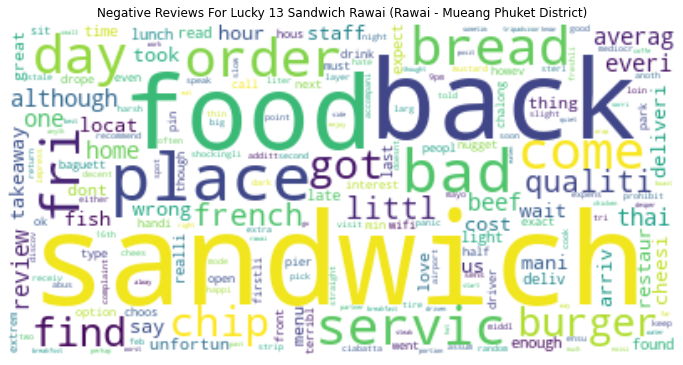

In [62]:
#Review for Lucky 13 Sandwich Rawai

Lucky13SandwichRawai_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='Lucky 13 Sandwich Rawai')&(Phuket_Reviews['Compound']>0),:]

Lucky13SandwichRawai_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='Lucky 13 Sandwich Rawai')&(Phuket_Reviews['Compound']<=0),:]
                                

#Wordcloud of words from negative reviews

Lucky13SandwichRawai_neg_tokens = [word for review in Lucky13SandwichRawai_negative_subset['processed_review'] for word in review]

Lucky13SandwichRawai_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(Lucky13SandwichRawai_neg_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(Lucky13SandwichRawai_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews For Lucky 13 Sandwich Rawai (Rawai - Mueang Phuket District)')
plt.axis('off')
plt.show()

sandwich     back     food    place      bad 
       8        6        5        5        4 


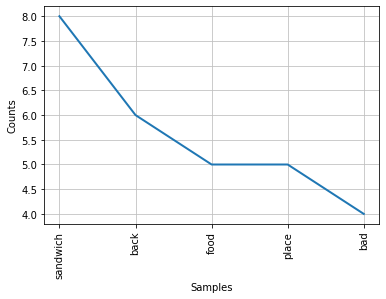

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [63]:
#use the nltk FreqDist and then tabulate the negative reviews


Lucky13SandwichRawai_neg_freqdist = FreqDist(Lucky13SandwichRawai_neg_tokens)

Lucky13SandwichRawai_neg_freqdist.tabulate(5)

##Visualize the frequency of top five negative reviews

Lucky13SandwichRawai_neg_freqdist.plot(5)

SALA MEXICALI (RAWAI - MUEANG PHUKET DISTRICT)

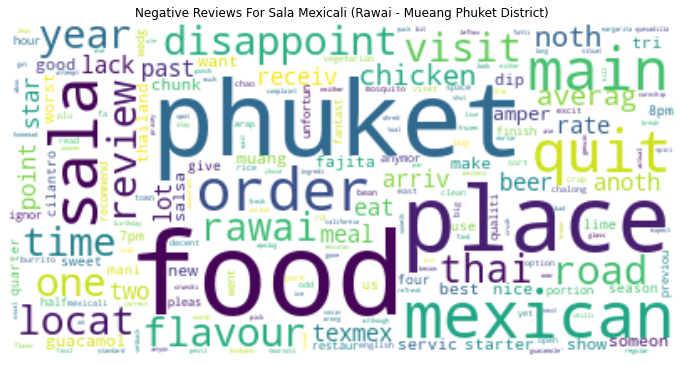

In [64]:
#Review for Sala Mexicali

SalaMexicali_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='Sala Mexicali')&(Phuket_Reviews['Compound']>0),:]

SalaMexicali_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='Sala Mexicali')&(Phuket_Reviews['Compound']<=0),:]
                                

#Wordcloud of words from negative reviews

SalaMexicali_neg_tokens = [word for review in SalaMexicali_negative_subset['processed_review'] for word in review]

SalaMexicali_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(SalaMexicali_neg_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(SalaMexicali_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews For Sala Mexicali (Rawai - Mueang Phuket District)')
plt.axis('off')
plt.show()

   food  phuket   place mexican    sala 
     10       8       6       5       5 


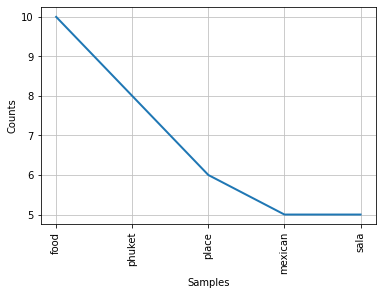

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [65]:
#use the nltk FreqDist and then tabulate the negative reviews


SalaMexicali_neg_freqdist = FreqDist(SalaMexicali_neg_tokens)

SalaMexicali_neg_freqdist.tabulate(5)

##Visualize the frequency of top five negative reviews

SalaMexicali_neg_freqdist.plot(5)

TAWAI THAI RESTAURANT (CHOENG THALE - THALANG DISTRICT)

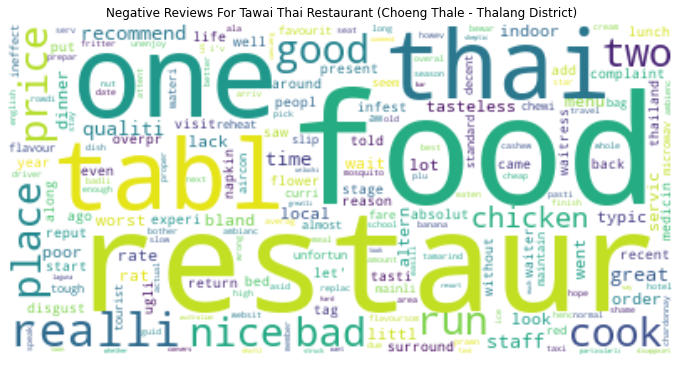

In [66]:
#Review for Hotels in Tawai Thai Restaurant

TawaiThaiRestaurant_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='Tawai Thai Restaurant')&(Phuket_Reviews['Compound']>0),:]

TawaiThaiRestaurant_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='Tawai Thai Restaurant')&(Phuket_Reviews['Compound']<=0),:]
                                

#Wordcloud of words from negative reviews

TawaiThaiRestaurant_neg_tokens = [word for review in TawaiThaiRestaurant_negative_subset['processed_review'] for word in review]

TawaiThaiRestaurant_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(TawaiThaiRestaurant_neg_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(TawaiThaiRestaurant_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews For Tawai Thai Restaurant (Choeng Thale - Thalang District)')
plt.axis('off')
plt.show()

   food restaur     one    tabl    thai 
     11       9       6       4       4 


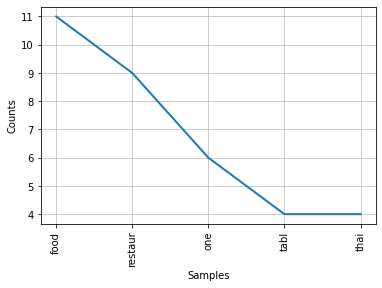

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [67]:
#use the nltk FreqDist and then tabulate the negative reviews


TawaiThaiRestaurant_neg_freqdist = FreqDist(TawaiThaiRestaurant_neg_tokens)

TawaiThaiRestaurant_neg_freqdist.tabulate(5)

##Visualize the frequency of top five negative reviews

TawaiThaiRestaurant_neg_freqdist.plot(5)

WHITE ORCHID (KAMALA - KATHU DISTRICT)

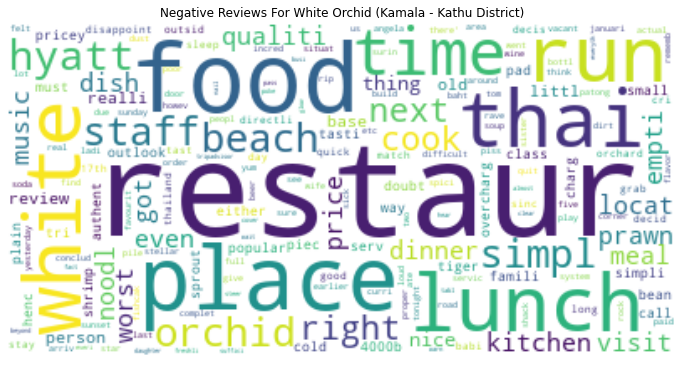

In [68]:
#Review for White Orchid

WhiteOrchid_positive_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='White Orchid')&(Phuket_Reviews['Compound']>0),:]

WhiteOrchid_negative_subset = Phuket_Reviews.loc[(Phuket_Reviews['Name']=='White Orchid')&(Phuket_Reviews['Compound']<=0),:]
                                

#Wordcloud of words from negative reviews

WhiteOrchid_neg_tokens = [word for review in WhiteOrchid_negative_subset['processed_review'] for word in review]

WhiteOrchid_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(WhiteOrchid_neg_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(WhiteOrchid_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews For White Orchid (Kamala - Kathu District)')
plt.axis('off')
plt.show()

restaur    food   place     run   lunch 
     13       6       5       4       4 


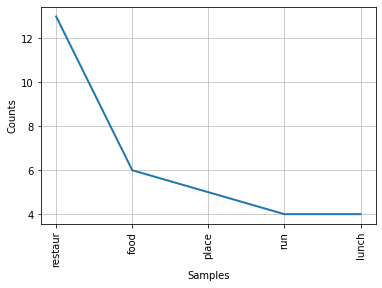

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [69]:
#use the nltk FreqDist and then tabulate the negative reviews


WhiteOrchid_neg_freqdist = FreqDist(WhiteOrchid_neg_tokens)

WhiteOrchid_neg_freqdist.tabulate(5)

##Visualize the frequency of top five negative reviews
WhiteOrchid_neg_freqdist.plot(5)